In [1]:
from google.colab import drive 
import os
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Internship/"
os.chdir(path)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import math
import pickle
import datetime

from utilsOT import *
from algos import *

Mounted at /content/drive


# Functions

In [ ]:
def calculate_W_list_SAG_eps_change (nu,mu,X_target,X_source,eps_init,n_iter) :
    n_target = len(X_target)
    n_source = len(X_source)

    W_list = np.zeros([n_iter//100])

    v = np.zeros(n_target)
    grad_vect = np.zeros([n_target,n_source])
    grad_moy = np.zeros(n_target)
    sum_mu = 0

    for i in range(0,n_iter):
        if i<n_source:
            idx = i
            sum_mu += mu[idx]
        else :
            idx = np.random.choice(range(n_source))
            sum_mu = 1
        
        epsilon = eps_init/np.sqrt(i+1)
        alpha = epsilon
        # if epsilon < 0.001:
        #     alpha = 0.001
        # else:
        #     alpha = epsilon
        
        if (i+1) % 100 == 0:
            W_list[((i+1)//100)-1] = W_sd(v,X_source,X_target,mu,nu,epsilon)
        
        grad_moy = grad_moy - grad_vect[:,idx]
        X_source_idx = X_source[idx,:]
        if epsilon == 0:  
            grad_idx = mu[idx] * grad_h_0(v,X_source_idx,X_target,nu)
        else:
            grad_idx = mu[idx] * grad_h_eps(v,X_source_idx,X_target,nu,epsilon)
        grad_vect[:,idx] = grad_idx
        grad_moy = grad_moy + grad_idx
        v = v + alpha / sum_mu * grad_moy

    return W_list


In [ ]:
def runALL(seeds, eps_init, n_iter):
    folder = 'eps10e'+str(np.log10(eps_init))
    for seed in seeds:
        if seed % 10 == 0:
            print('============= from '+str(seed)+' to '+str(seed+10)+' =============')

        np.random.seed(seed)

        n_target = np.random.randint(2,20)
        n_source = np.random.randint(2,20)
        n_source = 1000

        rho_list_target = generate_list_rho(3)
        rho_list_source = generate_list_rho(3)

        X_target = sample_rho_batch(rho_list_target,n_target)
        nu = np.random.rand(n_target)
        nu = nu/np.sum(nu) 

        X_source = sample_rho_batch(rho_list_source,n_source)
        mu = np.ones(n_source)
        mu = mu/np.sum(mu)

        t0 = datetime.datetime.now()

        W1 = calculate_W_list_SAG_eps_change (nu,mu,X_target,X_source,eps_init,n_iter)
        W2 = calculate_W_list_SAG_eps_change (mu,mu,X_source,X_source,eps_init,n_iter)
        W3 = calculate_W_list_SAG_eps_change (nu,nu,X_target,X_target,eps_init,n_iter)
        
        S = W1 - 1/2*(W2+W3)

        t1 = datetime.datetime.now()

        np.save('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/W1_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',W1)
        np.save('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/W2_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',W2)
        np.save('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/W3_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',W3)
        np.save('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/S_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy',S)

        print('eps_init: '+str(eps_init)+', seed: '+str(seed)+', time: '+ str((t1-t0).seconds))



# Test

In [ ]:
n_iter = 500000
eps_init = 0.1

In [ ]:
seed = 0
np.random.seed(seed)

n_target = np.random.randint(2,20)
n_source = np.random.randint(2,20)
n_source = 1000

rho_list_target = generate_list_rho(3)
rho_list_source = generate_list_rho(3)

X_target = sample_rho_batch(rho_list_target,n_target)
nu = np.random.rand(n_target)
nu = nu/np.sum(nu) 

X_source = sample_rho_batch(rho_list_source,n_source)
mu = np.ones(n_source)
mu = mu/np.sum(mu)

In [ ]:
W1 = np.zeros([n_iter])
W2 = np.zeros([n_iter])
W3 = np.zeros([n_iter])

In [ ]:
t0 = datetime.datetime.now()
W1 = calculate_W_list_SAG_eps_change (nu,mu,X_target,X_source,eps_init,n_iter)
t1 = datetime.datetime.now()
print(str((t1-t0).seconds))

In [ ]:
W2 = calculate_W_list_SAG_eps_change (mu,mu,X_source,X_source,eps_init,n_iter)

In [ ]:
W3 = calculate_W_list_SAG_eps_change (nu,nu,X_target,X_target,eps_init,n_iter)

In [ ]:
t0 = datetime.datetime.now()

W1 = calculate_W_list_SAG_eps_change (nu,mu,X_target,X_source,eps_init,n_iter)
W2 = calculate_W_list_SAG_eps_change (mu,mu,X_source,X_source,eps_init,n_iter)
W3 = calculate_W_list_SAG_eps_change (nu,nu,X_target,X_target,eps_init,n_iter)

t1 = datetime.datetime.now()
print(str((t1-t0).seconds))


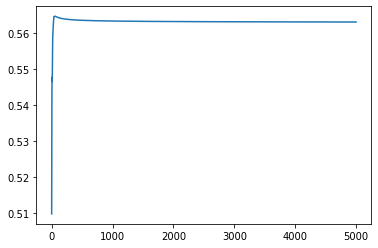

In [ ]:
plt.figure()
plt.plot(W1)
# plt.ylim([W1[-1]-10**(-4),W1[-1]+10**(-4)])
plt.show()
plt.close()

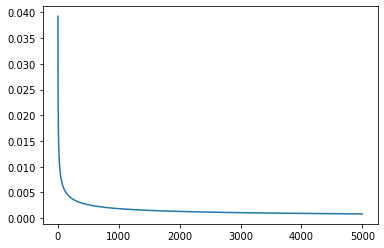

In [ ]:
plt.figure()
plt.plot(W2)
# plt.ylim([W2[-1]-10**(-4),W2[-1]+10**(-4)])
plt.show()
plt.close()

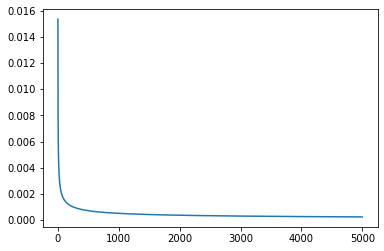

In [ ]:
plt.figure()
plt.plot(W3)
# plt.ylim([W3[-1]-10**(-4),W3[-1]+10**(-4)])
plt.show()
plt.close()

# eps_init = 0.0001

In [ ]:
runALL(seeds = range(0,18) ,eps_init = 0.0001, n_iter = 500000)

============= from 0 to 10 =============
eps_init: 0.0001, seed: 0, time: 1216
eps_init: 0.0001, seed: 1, time: 1198
eps_init: 0.0001, seed: 2, time: 1179
eps_init: 0.0001, seed: 3, time: 1182
eps_init: 0.0001, seed: 4, time: 1182
eps_init: 0.0001, seed: 5, time: 1176
eps_init: 0.0001, seed: 6, time: 1186
eps_init: 0.0001, seed: 7, time: 1187
eps_init: 0.0001, seed: 8, time: 1174
eps_init: 0.0001, seed: 9, time: 1174
============= from 10 to 20 =============
eps_init: 0.0001, seed: 10, time: 1184
eps_init: 0.0001, seed: 11, time: 1188
eps_init: 0.0001, seed: 12, time: 1185
eps_init: 0.0001, seed: 13, time: 1186
eps_init: 0.0001, seed: 14, time: 1182
eps_init: 0.0001, seed: 15, time: 1174
eps_init: 0.0001, seed: 16, time: 1175
eps_init: 0.0001, seed: 17, time: 1191


In [ ]:
runALL(seeds = range(18,30) ,eps_init = 0.0001, n_iter = 500000)

eps_init: 0.0001, seed: 18, time: 1000
eps_init: 0.0001, seed: 19, time: 1003
============= from 20 to 30 =============
eps_init: 0.0001, seed: 20, time: 991
eps_init: 0.0001, seed: 21, time: 996
eps_init: 0.0001, seed: 22, time: 984
eps_init: 0.0001, seed: 23, time: 979
eps_init: 0.0001, seed: 24, time: 983
eps_init: 0.0001, seed: 25, time: 979
eps_init: 0.0001, seed: 26, time: 984
eps_init: 0.0001, seed: 27, time: 982
eps_init: 0.0001, seed: 28, time: 960
eps_init: 0.0001, seed: 29, time: 952


In [ ]:
runALL(seeds = range(30,65) ,eps_init = 0.0001, n_iter = 500000)

============= from 30 to 40 =============
eps_init: 0.0001, seed: 30, time: 864
eps_init: 0.0001, seed: 31, time: 872
eps_init: 0.0001, seed: 32, time: 868
eps_init: 0.0001, seed: 33, time: 870
eps_init: 0.0001, seed: 34, time: 860
eps_init: 0.0001, seed: 35, time: 868
eps_init: 0.0001, seed: 36, time: 862
eps_init: 0.0001, seed: 37, time: 871
eps_init: 0.0001, seed: 38, time: 854
eps_init: 0.0001, seed: 39, time: 857
============= from 40 to 50 =============
eps_init: 0.0001, seed: 40, time: 858
eps_init: 0.0001, seed: 41, time: 853
eps_init: 0.0001, seed: 42, time: 860
eps_init: 0.0001, seed: 43, time: 848
eps_init: 0.0001, seed: 44, time: 839
eps_init: 0.0001, seed: 45, time: 846
eps_init: 0.0001, seed: 46, time: 845
eps_init: 0.0001, seed: 47, time: 848
eps_init: 0.0001, seed: 48, time: 837
eps_init: 0.0001, seed: 49, time: 842
============= from 50 to 60 =============
eps_init: 0.0001, seed: 50, time: 849
eps_init: 0.0001, seed: 51, time: 839
eps_init: 0.0001, seed: 52, time: 844


In [ ]:
runALL(seeds = range(65,81) ,eps_init = 0.0001, n_iter = 500000)

eps_init: 0.0001, seed: 65, time: 848
eps_init: 0.0001, seed: 66, time: 849
eps_init: 0.0001, seed: 67, time: 842
eps_init: 0.0001, seed: 68, time: 853
eps_init: 0.0001, seed: 69, time: 864
============= from 70 to 80 =============
eps_init: 0.0001, seed: 70, time: 862
eps_init: 0.0001, seed: 71, time: 855
eps_init: 0.0001, seed: 72, time: 855
eps_init: 0.0001, seed: 73, time: 851
eps_init: 0.0001, seed: 74, time: 853
eps_init: 0.0001, seed: 75, time: 864
eps_init: 0.0001, seed: 76, time: 855
eps_init: 0.0001, seed: 77, time: 851
eps_init: 0.0001, seed: 78, time: 855
eps_init: 0.0001, seed: 79, time: 857
============= from 80 to 90 =============
eps_init: 0.0001, seed: 80, time: 861


In [ ]:
runALL(seeds = range(81,100) ,eps_init = 0.0001, n_iter = 500000)

eps_init: 0.0001, seed: 81, time: 910
eps_init: 0.0001, seed: 82, time: 924
eps_init: 0.0001, seed: 83, time: 916
eps_init: 0.0001, seed: 84, time: 917
eps_init: 0.0001, seed: 85, time: 924
eps_init: 0.0001, seed: 86, time: 909
eps_init: 0.0001, seed: 87, time: 921
eps_init: 0.0001, seed: 88, time: 908
eps_init: 0.0001, seed: 89, time: 920
============= from 90 to 100 =============
eps_init: 0.0001, seed: 90, time: 914
eps_init: 0.0001, seed: 91, time: 918
eps_init: 0.0001, seed: 92, time: 919
eps_init: 0.0001, seed: 93, time: 912
eps_init: 0.0001, seed: 94, time: 916
eps_init: 0.0001, seed: 95, time: 916
eps_init: 0.0001, seed: 96, time: 920
eps_init: 0.0001, seed: 97, time: 895
eps_init: 0.0001, seed: 98, time: 888
eps_init: 0.0001, seed: 99, time: 882


# eps_init = 0.001

In [ ]:
runALL(seeds = range(0,30) ,eps_init = 0.001, n_iter = 500000)

============= from 0 to 10 =============
eps_init: 0.001, seed: 0, time: 964
eps_init: 0.001, seed: 1, time: 942
eps_init: 0.001, seed: 2, time: 944
eps_init: 0.001, seed: 3, time: 954
eps_init: 0.001, seed: 4, time: 1037
eps_init: 0.001, seed: 5, time: 932
eps_init: 0.001, seed: 6, time: 932
eps_init: 0.001, seed: 7, time: 940
eps_init: 0.001, seed: 8, time: 940
eps_init: 0.001, seed: 9, time: 938
============= from 10 to 20 =============
eps_init: 0.001, seed: 10, time: 948
eps_init: 0.001, seed: 11, time: 945
eps_init: 0.001, seed: 12, time: 945
eps_init: 0.001, seed: 13, time: 951
eps_init: 0.001, seed: 14, time: 948
eps_init: 0.001, seed: 15, time: 942
eps_init: 0.001, seed: 16, time: 1045
eps_init: 0.001, seed: 17, time: 1012
eps_init: 0.001, seed: 18, time: 943
eps_init: 0.001, seed: 19, time: 948
============= from 20 to 30 =============
eps_init: 0.001, seed: 20, time: 940
eps_init: 0.001, seed: 21, time: 943
eps_init: 0.001, seed: 22, time: 935
eps_init: 0.001, seed: 23, time

In [ ]:
runALL(seeds = range(30,42) ,eps_init = 0.001, n_iter = 500000)

============= from 30 to 40 =============
eps_init: 0.001, seed: 30, time: 1033
eps_init: 0.001, seed: 31, time: 1029
eps_init: 0.001, seed: 32, time: 1029
eps_init: 0.001, seed: 33, time: 1015
eps_init: 0.001, seed: 34, time: 1030
eps_init: 0.001, seed: 35, time: 1023
eps_init: 0.001, seed: 36, time: 1009
eps_init: 0.001, seed: 37, time: 1058
eps_init: 0.001, seed: 38, time: 1035
eps_init: 0.001, seed: 39, time: 1024
============= from 40 to 50 =============
eps_init: 0.001, seed: 40, time: 1021
eps_init: 0.001, seed: 41, time: 1011


In [ ]:
runALL(seeds = range(42,60) ,eps_init = 0.001, n_iter = 500000)

eps_init: 0.001, seed: 42, time: 944
eps_init: 0.001, seed: 43, time: 942
eps_init: 0.001, seed: 44, time: 943
eps_init: 0.001, seed: 45, time: 944
eps_init: 0.001, seed: 46, time: 938
eps_init: 0.001, seed: 47, time: 948
eps_init: 0.001, seed: 48, time: 942
eps_init: 0.001, seed: 49, time: 947
============= from 50 to 60 =============
eps_init: 0.001, seed: 50, time: 954
eps_init: 0.001, seed: 51, time: 947
eps_init: 0.001, seed: 52, time: 949
eps_init: 0.001, seed: 53, time: 949
eps_init: 0.001, seed: 54, time: 952
eps_init: 0.001, seed: 55, time: 956
eps_init: 0.001, seed: 56, time: 945
eps_init: 0.001, seed: 57, time: 954
eps_init: 0.001, seed: 58, time: 944
eps_init: 0.001, seed: 59, time: 954


In [ ]:
runALL(seeds = range(60,100) ,eps_init = 0.001, n_iter = 500000)

============= from 60 to 70 =============
eps_init: 0.001, seed: 60, time: 974
eps_init: 0.001, seed: 61, time: 988
eps_init: 0.001, seed: 62, time: 984
eps_init: 0.001, seed: 63, time: 1025
eps_init: 0.001, seed: 64, time: 991
eps_init: 0.001, seed: 65, time: 977
eps_init: 0.001, seed: 66, time: 1136
eps_init: 0.001, seed: 67, time: 968
eps_init: 0.001, seed: 68, time: 968
eps_init: 0.001, seed: 69, time: 981
============= from 70 to 80 =============
eps_init: 0.001, seed: 70, time: 976
eps_init: 0.001, seed: 71, time: 986
eps_init: 0.001, seed: 72, time: 1000
eps_init: 0.001, seed: 73, time: 1048
eps_init: 0.001, seed: 74, time: 1013
eps_init: 0.001, seed: 75, time: 1023
eps_init: 0.001, seed: 76, time: 1048
eps_init: 0.001, seed: 77, time: 996
eps_init: 0.001, seed: 78, time: 950
eps_init: 0.001, seed: 79, time: 993
============= from 80 to 90 =============
eps_init: 0.001, seed: 80, time: 982
eps_init: 0.001, seed: 81, time: 957
eps_init: 0.001, seed: 82, time: 990
eps_init: 0.001,

# eps_init = 0.01

In [ ]:
runALL(seeds = range(0,30) ,eps_init = 0.01, n_iter = 500000)

============= from 0 to 10 =============
eps_init: 0.01, seed: 0, time: 996
eps_init: 0.01, seed: 1, time: 973
eps_init: 0.01, seed: 2, time: 965
eps_init: 0.01, seed: 3, time: 968
eps_init: 0.01, seed: 4, time: 983
eps_init: 0.01, seed: 5, time: 967
eps_init: 0.01, seed: 6, time: 968
eps_init: 0.01, seed: 7, time: 977
eps_init: 0.01, seed: 8, time: 962
eps_init: 0.01, seed: 9, time: 964
============= from 10 to 20 =============
eps_init: 0.01, seed: 10, time: 967
eps_init: 0.01, seed: 11, time: 971
eps_init: 0.01, seed: 12, time: 966
eps_init: 0.01, seed: 13, time: 970
eps_init: 0.01, seed: 14, time: 964
eps_init: 0.01, seed: 15, time: 964
eps_init: 0.01, seed: 16, time: 965
eps_init: 0.01, seed: 17, time: 964
eps_init: 0.01, seed: 18, time: 961
eps_init: 0.01, seed: 19, time: 963
============= from 20 to 30 =============
eps_init: 0.01, seed: 20, time: 962
eps_init: 0.01, seed: 21, time: 964
eps_init: 0.01, seed: 22, time: 958
eps_init: 0.01, seed: 23, time: 954
eps_init: 0.01, seed:

In [ ]:
runALL(seeds = range(30,35) ,eps_init = 0.01, n_iter = 500000)

============= from 30 to 40 =============
eps_init: 0.01, seed: 30, time: 1011
eps_init: 0.01, seed: 31, time: 1009
eps_init: 0.01, seed: 32, time: 992
eps_init: 0.01, seed: 33, time: 989
eps_init: 0.01, seed: 34, time: 979


In [ ]:
runALL(seeds = range(35,60) ,eps_init = 0.01, n_iter = 500000)

eps_init: 0.01, seed: 35, time: 943
eps_init: 0.01, seed: 36, time: 931
eps_init: 0.01, seed: 37, time: 939
eps_init: 0.01, seed: 38, time: 933
eps_init: 0.01, seed: 39, time: 941
============= from 40 to 50 =============
eps_init: 0.01, seed: 40, time: 939
eps_init: 0.01, seed: 41, time: 931
eps_init: 0.01, seed: 42, time: 935
eps_init: 0.01, seed: 43, time: 929
eps_init: 0.01, seed: 44, time: 928
eps_init: 0.01, seed: 45, time: 930
eps_init: 0.01, seed: 46, time: 933
eps_init: 0.01, seed: 47, time: 930
eps_init: 0.01, seed: 48, time: 924
eps_init: 0.01, seed: 49, time: 934
============= from 50 to 60 =============
eps_init: 0.01, seed: 50, time: 943
eps_init: 0.01, seed: 51, time: 939
eps_init: 0.01, seed: 52, time: 940
eps_init: 0.01, seed: 53, time: 936
eps_init: 0.01, seed: 54, time: 939
eps_init: 0.01, seed: 55, time: 940
eps_init: 0.01, seed: 56, time: 935
eps_init: 0.01, seed: 57, time: 941
eps_init: 0.01, seed: 58, time: 935
eps_init: 0.01, seed: 59, time: 944


In [ ]:
runALL(seeds = range(60,100) ,eps_init = 0.01, n_iter = 500000)

============= from 60 to 70 =============
eps_init: 0.01, seed: 60, time: 1137
eps_init: 0.01, seed: 61, time: 981
eps_init: 0.01, seed: 62, time: 1020
eps_init: 0.01, seed: 63, time: 1002
eps_init: 0.01, seed: 64, time: 1005
eps_init: 0.01, seed: 65, time: 1021
eps_init: 0.01, seed: 66, time: 1073
eps_init: 0.01, seed: 67, time: 1059
eps_init: 0.01, seed: 68, time: 1001
eps_init: 0.01, seed: 69, time: 1005
============= from 70 to 80 =============
eps_init: 0.01, seed: 70, time: 992
eps_init: 0.01, seed: 71, time: 990
eps_init: 0.01, seed: 72, time: 973
eps_init: 0.01, seed: 73, time: 983
eps_init: 0.01, seed: 74, time: 980
eps_init: 0.01, seed: 75, time: 985
eps_init: 0.01, seed: 76, time: 967
eps_init: 0.01, seed: 77, time: 987
eps_init: 0.01, seed: 78, time: 977
eps_init: 0.01, seed: 79, time: 1001
============= from 80 to 90 =============
eps_init: 0.01, seed: 80, time: 1005
eps_init: 0.01, seed: 81, time: 984
eps_init: 0.01, seed: 82, time: 985
eps_init: 0.01, seed: 83, time: 984

# eps_init = 0.1

In [ ]:
runALL(seeds = range(0,30) ,eps_init = 0.1, n_iter = 500000)

============= from 0 to 10 =============
eps_init: 0.1, seed: 0, time: 1171
eps_init: 0.1, seed: 1, time: 1128
eps_init: 0.1, seed: 2, time: 1130
eps_init: 0.1, seed: 3, time: 1147
eps_init: 0.1, seed: 4, time: 1137
eps_init: 0.1, seed: 5, time: 1135
eps_init: 0.1, seed: 6, time: 1141
eps_init: 0.1, seed: 7, time: 1144
eps_init: 0.1, seed: 8, time: 1134
eps_init: 0.1, seed: 9, time: 1135
============= from 10 to 20 =============
eps_init: 0.1, seed: 10, time: 1150
eps_init: 0.1, seed: 11, time: 1149
eps_init: 0.1, seed: 12, time: 1151
eps_init: 0.1, seed: 13, time: 1159
eps_init: 0.1, seed: 14, time: 1151
eps_init: 0.1, seed: 15, time: 1140
eps_init: 0.1, seed: 16, time: 1137
eps_init: 0.1, seed: 17, time: 1134
eps_init: 0.1, seed: 18, time: 1153
eps_init: 0.1, seed: 19, time: 1137
============= from 20 to 30 =============
eps_init: 0.1, seed: 20, time: 1135
eps_init: 0.1, seed: 21, time: 1144
eps_init: 0.1, seed: 22, time: 1142
eps_init: 0.1, seed: 23, time: 1136
eps_init: 0.1, seed: 

In [ ]:
runALL(seeds = range(30,60) ,eps_init = 0.1, n_iter = 500000)

============= from 30 to 40 =============
eps_init: 0.1, seed: 30, time: 986
eps_init: 0.1, seed: 31, time: 992
eps_init: 0.1, seed: 32, time: 976
eps_init: 0.1, seed: 33, time: 980
eps_init: 0.1, seed: 34, time: 987
eps_init: 0.1, seed: 35, time: 992
eps_init: 0.1, seed: 36, time: 983
eps_init: 0.1, seed: 37, time: 992
eps_init: 0.1, seed: 38, time: 975
eps_init: 0.1, seed: 39, time: 981
============= from 40 to 50 =============
eps_init: 0.1, seed: 40, time: 999
eps_init: 0.1, seed: 41, time: 1002
eps_init: 0.1, seed: 42, time: 1005
eps_init: 0.1, seed: 43, time: 997
eps_init: 0.1, seed: 44, time: 994
eps_init: 0.1, seed: 45, time: 1011
eps_init: 0.1, seed: 46, time: 1005
eps_init: 0.1, seed: 47, time: 1026
eps_init: 0.1, seed: 48, time: 1010
eps_init: 0.1, seed: 49, time: 1010
============= from 50 to 60 =============
eps_init: 0.1, seed: 50, time: 1024
eps_init: 0.1, seed: 51, time: 1003
eps_init: 0.1, seed: 52, time: 1002
eps_init: 0.1, seed: 53, time: 1003
eps_init: 0.1, seed: 54

In [ ]:
runALL(seeds = range(60,100) ,eps_init = 0.1, n_iter = 500000)

============= from 60 to 70 =============
eps_init: 0.1, seed: 60, time: 1060
eps_init: 0.1, seed: 61, time: 1038
eps_init: 0.1, seed: 62, time: 1061
eps_init: 0.1, seed: 63, time: 1041
eps_init: 0.1, seed: 64, time: 1033
eps_init: 0.1, seed: 65, time: 1042
eps_init: 0.1, seed: 66, time: 1051
eps_init: 0.1, seed: 67, time: 1038
eps_init: 0.1, seed: 68, time: 1032
eps_init: 0.1, seed: 69, time: 1035
============= from 70 to 80 =============
eps_init: 0.1, seed: 70, time: 1016
eps_init: 0.1, seed: 71, time: 1011
eps_init: 0.1, seed: 72, time: 1005
eps_init: 0.1, seed: 73, time: 1019
eps_init: 0.1, seed: 74, time: 1013
eps_init: 0.1, seed: 75, time: 1013
eps_init: 0.1, seed: 76, time: 1003
eps_init: 0.1, seed: 77, time: 1156
eps_init: 0.1, seed: 78, time: 1138
eps_init: 0.1, seed: 79, time: 1022
============= from 80 to 90 =============
eps_init: 0.1, seed: 80, time: 1018
eps_init: 0.1, seed: 81, time: 998
eps_init: 0.1, seed: 82, time: 1037
eps_init: 0.1, seed: 83, time: 1007
eps_init: 0

# eps_init = 1

In [ ]:
runALL(seeds = range(0,30) ,eps_init = 1, n_iter = 500000)

============= from 0 to 10 =============
eps_init: 1, seed: 0, time: 978
eps_init: 1, seed: 1, time: 973
eps_init: 1, seed: 2, time: 970
eps_init: 1, seed: 3, time: 947
eps_init: 1, seed: 4, time: 952
eps_init: 1, seed: 5, time: 946
eps_init: 1, seed: 6, time: 969
eps_init: 1, seed: 7, time: 960
eps_init: 1, seed: 8, time: 946
eps_init: 1, seed: 9, time: 947
============= from 10 to 20 =============
eps_init: 1, seed: 10, time: 948
eps_init: 1, seed: 11, time: 963
eps_init: 1, seed: 12, time: 954
eps_init: 1, seed: 13, time: 972
eps_init: 1, seed: 14, time: 987
eps_init: 1, seed: 15, time: 970
eps_init: 1, seed: 16, time: 982
eps_init: 1, seed: 17, time: 996
eps_init: 1, seed: 18, time: 950
eps_init: 1, seed: 19, time: 1023
============= from 20 to 30 =============
eps_init: 1, seed: 20, time: 1050
eps_init: 1, seed: 21, time: 1013
eps_init: 1, seed: 22, time: 953
eps_init: 1, seed: 23, time: 983
eps_init: 1, seed: 24, time: 974
eps_init: 1, seed: 25, time: 1016
eps_init: 1, seed: 26, 

In [ ]:
runALL(seeds = range(30,35) ,eps_init = 1, n_iter = 500000)

============= from 30 to 40 =============
eps_init: 1, seed: 30, time: 971
eps_init: 1, seed: 31, time: 969
eps_init: 1, seed: 32, time: 988
eps_init: 1, seed: 33, time: 979
eps_init: 1, seed: 34, time: 973


In [ ]:
runALL(seeds = range(35,60) ,eps_init = 1, n_iter = 500000)

eps_init: 1, seed: 35, time: 938
eps_init: 1, seed: 36, time: 935
eps_init: 1, seed: 37, time: 946
eps_init: 1, seed: 38, time: 938
eps_init: 1, seed: 39, time: 959
============= from 40 to 50 =============
eps_init: 1, seed: 40, time: 923
eps_init: 1, seed: 41, time: 934
eps_init: 1, seed: 42, time: 940
eps_init: 1, seed: 43, time: 939
eps_init: 1, seed: 44, time: 930
eps_init: 1, seed: 45, time: 936
eps_init: 1, seed: 46, time: 948
eps_init: 1, seed: 47, time: 929
eps_init: 1, seed: 48, time: 922
eps_init: 1, seed: 49, time: 950
============= from 50 to 60 =============
eps_init: 1, seed: 50, time: 931
eps_init: 1, seed: 51, time: 941
eps_init: 1, seed: 52, time: 941
eps_init: 1, seed: 53, time: 933
eps_init: 1, seed: 54, time: 948
eps_init: 1, seed: 55, time: 937
eps_init: 1, seed: 56, time: 924
eps_init: 1, seed: 57, time: 952
eps_init: 1, seed: 58, time: 921
eps_init: 1, seed: 59, time: 929


In [ ]:
runALL(seeds = range(60,83) ,eps_init = 1, n_iter = 500000)

============= from 60 to 70 =============
eps_init: 1, seed: 60, time: 939
eps_init: 1, seed: 61, time: 955
eps_init: 1, seed: 62, time: 909
eps_init: 1, seed: 63, time: 935
eps_init: 1, seed: 64, time: 918
eps_init: 1, seed: 65, time: 922
eps_init: 1, seed: 66, time: 914
eps_init: 1, seed: 67, time: 908
eps_init: 1, seed: 68, time: 938
eps_init: 1, seed: 69, time: 919
============= from 70 to 80 =============
eps_init: 1, seed: 70, time: 946
eps_init: 1, seed: 71, time: 927
eps_init: 1, seed: 72, time: 933
eps_init: 1, seed: 73, time: 900
eps_init: 1, seed: 74, time: 905
eps_init: 1, seed: 75, time: 934
eps_init: 1, seed: 76, time: 899
eps_init: 1, seed: 77, time: 897
eps_init: 1, seed: 78, time: 900
eps_init: 1, seed: 79, time: 913
============= from 80 to 90 =============
eps_init: 1, seed: 80, time: 918
eps_init: 1, seed: 81, time: 915
eps_init: 1, seed: 82, time: 918


In [ ]:
runALL(seeds = range(83,100) ,eps_init = 1, n_iter = 500000)

eps_init: 1, seed: 83, time: 858
eps_init: 1, seed: 84, time: 863
eps_init: 1, seed: 85, time: 855
eps_init: 1, seed: 86, time: 850
eps_init: 1, seed: 87, time: 869
eps_init: 1, seed: 88, time: 845
eps_init: 1, seed: 89, time: 866
============= from 90 to 100 =============
eps_init: 1, seed: 90, time: 853
eps_init: 1, seed: 91, time: 852
eps_init: 1, seed: 92, time: 864
eps_init: 1, seed: 93, time: 873
eps_init: 1, seed: 94, time: 854
eps_init: 1, seed: 95, time: 862
eps_init: 1, seed: 96, time: 841
eps_init: 1, seed: 97, time: 823
eps_init: 1, seed: 98, time: 860
eps_init: 1, seed: 99, time: 845


# eps_init = 10

In [ ]:
runALL(seeds = range(0,30) ,eps_init = 10, n_iter = 500000)

============= from 0 to 10 =============
eps_init: 10, seed: 0, time: 879
eps_init: 10, seed: 1, time: 864
eps_init: 10, seed: 2, time: 866
eps_init: 10, seed: 3, time: 866
eps_init: 10, seed: 4, time: 869
eps_init: 10, seed: 5, time: 863
eps_init: 10, seed: 6, time: 867
eps_init: 10, seed: 7, time: 872
eps_init: 10, seed: 8, time: 861
eps_init: 10, seed: 9, time: 860
============= from 10 to 20 =============
eps_init: 10, seed: 10, time: 867
eps_init: 10, seed: 11, time: 871
eps_init: 10, seed: 12, time: 868
eps_init: 10, seed: 13, time: 874
eps_init: 10, seed: 14, time: 875
eps_init: 10, seed: 15, time: 869
eps_init: 10, seed: 16, time: 869
eps_init: 10, seed: 17, time: 874
eps_init: 10, seed: 18, time: 870
eps_init: 10, seed: 19, time: 874
============= from 20 to 30 =============
eps_init: 10, seed: 20, time: 865
eps_init: 10, seed: 21, time: 867
eps_init: 10, seed: 22, time: 865
eps_init: 10, seed: 23, time: 872
eps_init: 10, seed: 24, time: 866
eps_init: 10, seed: 25, time: 865
e

In [ ]:
runALL(seeds = range(30,60) ,eps_init = 10, n_iter = 500000)

============= from 30 to 40 =============
eps_init: 10, seed: 30, time: 920
eps_init: 10, seed: 31, time: 921
eps_init: 10, seed: 32, time: 929
eps_init: 10, seed: 33, time: 921
eps_init: 10, seed: 34, time: 912
eps_init: 10, seed: 35, time: 921
eps_init: 10, seed: 36, time: 916
eps_init: 10, seed: 37, time: 928
eps_init: 10, seed: 38, time: 915
eps_init: 10, seed: 39, time: 930
============= from 40 to 50 =============
eps_init: 10, seed: 40, time: 909
eps_init: 10, seed: 41, time: 889
eps_init: 10, seed: 42, time: 889
eps_init: 10, seed: 43, time: 892
eps_init: 10, seed: 44, time: 896
eps_init: 10, seed: 45, time: 899
eps_init: 10, seed: 46, time: 895
eps_init: 10, seed: 47, time: 902
eps_init: 10, seed: 48, time: 893
eps_init: 10, seed: 49, time: 898
============= from 50 to 60 =============
eps_init: 10, seed: 50, time: 906
eps_init: 10, seed: 51, time: 903
eps_init: 10, seed: 52, time: 904
eps_init: 10, seed: 53, time: 897
eps_init: 10, seed: 54, time: 908
eps_init: 10, seed: 55, 

In [ ]:
runALL(seeds = range(60,100) ,eps_init = 10, n_iter = 500000)

============= from 60 to 70 =============
eps_init: 10, seed: 60, time: 1007
eps_init: 10, seed: 61, time: 1001
eps_init: 10, seed: 62, time: 1010
eps_init: 10, seed: 63, time: 1000
eps_init: 10, seed: 64, time: 1001
eps_init: 10, seed: 65, time: 1004
eps_init: 10, seed: 66, time: 1014
eps_init: 10, seed: 67, time: 1001
eps_init: 10, seed: 68, time: 1032
eps_init: 10, seed: 69, time: 1030
============= from 70 to 80 =============
eps_init: 10, seed: 70, time: 1029
eps_init: 10, seed: 71, time: 1053
eps_init: 10, seed: 72, time: 1034
eps_init: 10, seed: 73, time: 1020
eps_init: 10, seed: 74, time: 1022
eps_init: 10, seed: 75, time: 1017
eps_init: 10, seed: 76, time: 1001
eps_init: 10, seed: 77, time: 1019
eps_init: 10, seed: 78, time: 1008
eps_init: 10, seed: 79, time: 1011
============= from 80 to 90 =============
eps_init: 10, seed: 80, time: 1001
eps_init: 10, seed: 81, time: 975
eps_init: 10, seed: 82, time: 974
eps_init: 10, seed: 83, time: 980
eps_init: 10, seed: 84, time: 980
eps

# eps_init = 100

In [ ]:
runALL(seeds = range(0,9) ,eps_init = 100, n_iter = 500000)

============= from 0 to 10 =============
eps_init: 100, seed: 0, time: 902
eps_init: 100, seed: 1, time: 899
eps_init: 100, seed: 2, time: 902
eps_init: 100, seed: 3, time: 903
eps_init: 100, seed: 4, time: 907
eps_init: 100, seed: 5, time: 897
eps_init: 100, seed: 6, time: 902
eps_init: 100, seed: 7, time: 906
eps_init: 100, seed: 8, time: 895


In [ ]:
runALL(seeds = range(9,30) ,eps_init = 100, n_iter = 500000)

eps_init: 100, seed: 9, time: 1117
============= from 10 to 20 =============
eps_init: 100, seed: 10, time: 1115
eps_init: 100, seed: 11, time: 1121
eps_init: 100, seed: 12, time: 1126
eps_init: 100, seed: 13, time: 1136
eps_init: 100, seed: 14, time: 1127
eps_init: 100, seed: 15, time: 1126
eps_init: 100, seed: 16, time: 1130
eps_init: 100, seed: 17, time: 1133
eps_init: 100, seed: 18, time: 1118
eps_init: 100, seed: 19, time: 1127
============= from 20 to 30 =============
eps_init: 100, seed: 20, time: 1117
eps_init: 100, seed: 21, time: 1122
eps_init: 100, seed: 22, time: 1113
eps_init: 100, seed: 23, time: 1120
eps_init: 100, seed: 24, time: 1110
eps_init: 100, seed: 25, time: 1118
eps_init: 100, seed: 26, time: 1116
eps_init: 100, seed: 27, time: 1121
eps_init: 100, seed: 28, time: 1112
eps_init: 100, seed: 29, time: 1122


In [ ]:
runALL(seeds = range(30,60) ,eps_init = 100, n_iter = 500000)

============= from 30 to 40 =============
eps_init: 100, seed: 30, time: 971
eps_init: 100, seed: 31, time: 985
eps_init: 100, seed: 32, time: 979
eps_init: 100, seed: 33, time: 977
eps_init: 100, seed: 34, time: 970
eps_init: 100, seed: 35, time: 978
eps_init: 100, seed: 36, time: 988
eps_init: 100, seed: 37, time: 989
eps_init: 100, seed: 38, time: 971
eps_init: 100, seed: 39, time: 981
============= from 40 to 50 =============
eps_init: 100, seed: 40, time: 974
eps_init: 100, seed: 41, time: 974
eps_init: 100, seed: 42, time: 975
eps_init: 100, seed: 43, time: 971
eps_init: 100, seed: 44, time: 978
eps_init: 100, seed: 45, time: 948
eps_init: 100, seed: 46, time: 945
eps_init: 100, seed: 47, time: 949
eps_init: 100, seed: 48, time: 942
eps_init: 100, seed: 49, time: 950
============= from 50 to 60 =============
eps_init: 100, seed: 50, time: 955
eps_init: 100, seed: 51, time: 952
eps_init: 100, seed: 52, time: 948
eps_init: 100, seed: 53, time: 946
eps_init: 100, seed: 54, time: 958

In [ ]:
runALL(seeds = range(60,100) ,eps_init = 100, n_iter = 500000)

============= from 60 to 70 =============
eps_init: 100, seed: 60, time: 994
eps_init: 100, seed: 61, time: 986
eps_init: 100, seed: 62, time: 993
eps_init: 100, seed: 63, time: 999
eps_init: 100, seed: 64, time: 993
eps_init: 100, seed: 65, time: 993
eps_init: 100, seed: 66, time: 996
eps_init: 100, seed: 67, time: 987
eps_init: 100, seed: 68, time: 989
eps_init: 100, seed: 69, time: 995
============= from 70 to 80 =============
eps_init: 100, seed: 70, time: 994
eps_init: 100, seed: 71, time: 997
eps_init: 100, seed: 72, time: 1000
eps_init: 100, seed: 73, time: 993
eps_init: 100, seed: 74, time: 978
eps_init: 100, seed: 75, time: 962
eps_init: 100, seed: 76, time: 953
eps_init: 100, seed: 77, time: 960
eps_init: 100, seed: 78, time: 955
eps_init: 100, seed: 79, time: 960
============= from 80 to 90 =============
eps_init: 100, seed: 80, time: 967
eps_init: 100, seed: 81, time: 955
eps_init: 100, seed: 82, time: 956
eps_init: 100, seed: 83, time: 961
eps_init: 100, seed: 84, time: 96

# eps_init = 1000

In [ ]:
runALL(seeds = range(0,30) ,eps_init = 1000, n_iter = 500000)

============= from 0 to 10 =============
eps_init: 1000, seed: 0, time: 949
eps_init: 1000, seed: 1, time: 960
eps_init: 1000, seed: 2, time: 936
eps_init: 1000, seed: 3, time: 932
eps_init: 1000, seed: 4, time: 941
eps_init: 1000, seed: 5, time: 974
eps_init: 1000, seed: 6, time: 969
eps_init: 1000, seed: 7, time: 982
eps_init: 1000, seed: 8, time: 986
eps_init: 1000, seed: 9, time: 907
============= from 10 to 20 =============
eps_init: 1000, seed: 10, time: 929
eps_init: 1000, seed: 11, time: 927
eps_init: 1000, seed: 12, time: 977
eps_init: 1000, seed: 13, time: 967
eps_init: 1000, seed: 14, time: 942
eps_init: 1000, seed: 15, time: 940
eps_init: 1000, seed: 16, time: 931
eps_init: 1000, seed: 17, time: 930
eps_init: 1000, seed: 18, time: 939
eps_init: 1000, seed: 19, time: 936
============= from 20 to 30 =============
eps_init: 1000, seed: 20, time: 1000
eps_init: 1000, seed: 21, time: 946
eps_init: 1000, seed: 22, time: 934
eps_init: 1000, seed: 23, time: 998
eps_init: 1000, seed

In [ ]:
runALL(seeds = range(30,60) ,eps_init = 1000, n_iter = 500000)

============= from 30 to 40 =============
eps_init: 1000, seed: 30, time: 915
eps_init: 1000, seed: 31, time: 928
eps_init: 1000, seed: 32, time: 921
eps_init: 1000, seed: 33, time: 919
eps_init: 1000, seed: 34, time: 891
eps_init: 1000, seed: 35, time: 893
eps_init: 1000, seed: 36, time: 891
eps_init: 1000, seed: 37, time: 919
eps_init: 1000, seed: 38, time: 904
eps_init: 1000, seed: 39, time: 897
============= from 40 to 50 =============
eps_init: 1000, seed: 40, time: 890
eps_init: 1000, seed: 41, time: 896
eps_init: 1000, seed: 42, time: 893
eps_init: 1000, seed: 43, time: 888
eps_init: 1000, seed: 44, time: 889
eps_init: 1000, seed: 45, time: 895
eps_init: 1000, seed: 46, time: 887
eps_init: 1000, seed: 47, time: 892
eps_init: 1000, seed: 48, time: 886
eps_init: 1000, seed: 49, time: 897
============= from 50 to 60 =============
eps_init: 1000, seed: 50, time: 949
eps_init: 1000, seed: 51, time: 891
eps_init: 1000, seed: 52, time: 898
eps_init: 1000, seed: 53, time: 895
eps_init: 

In [ ]:
runALL(seeds = range(60,100) ,eps_init = 1000, n_iter = 500000)

============= from 60 to 70 =============
eps_init: 1000, seed: 60, time: 989
eps_init: 1000, seed: 61, time: 985
eps_init: 1000, seed: 62, time: 994
eps_init: 1000, seed: 63, time: 990
eps_init: 1000, seed: 64, time: 986
eps_init: 1000, seed: 65, time: 992
eps_init: 1000, seed: 66, time: 993
eps_init: 1000, seed: 67, time: 977
eps_init: 1000, seed: 68, time: 951
eps_init: 1000, seed: 69, time: 953
============= from 70 to 80 =============
eps_init: 1000, seed: 70, time: 953
eps_init: 1000, seed: 71, time: 955
eps_init: 1000, seed: 72, time: 953
eps_init: 1000, seed: 73, time: 951
eps_init: 1000, seed: 74, time: 945
eps_init: 1000, seed: 75, time: 951
eps_init: 1000, seed: 76, time: 940
eps_init: 1000, seed: 77, time: 953
eps_init: 1000, seed: 78, time: 948
eps_init: 1000, seed: 79, time: 950
============= from 80 to 90 =============
eps_init: 1000, seed: 80, time: 953
eps_init: 1000, seed: 81, time: 941
eps_init: 1000, seed: 82, time: 948
eps_init: 1000, seed: 83, time: 946
eps_init: 

# eps_init = 10000

In [ ]:
runALL(seeds = range(0,15) ,eps_init = 10000, n_iter = 500000)

============= from 0 to 10 =============
eps_init: 10000, seed: 0, time: 979
eps_init: 10000, seed: 1, time: 969
eps_init: 10000, seed: 2, time: 977
eps_init: 10000, seed: 3, time: 976
eps_init: 10000, seed: 4, time: 1005
eps_init: 10000, seed: 5, time: 940
eps_init: 10000, seed: 6, time: 940
eps_init: 10000, seed: 7, time: 942
eps_init: 10000, seed: 8, time: 936
eps_init: 10000, seed: 9, time: 928
============= from 10 to 20 =============
eps_init: 10000, seed: 10, time: 938
eps_init: 10000, seed: 11, time: 946
eps_init: 10000, seed: 12, time: 937
eps_init: 10000, seed: 13, time: 953
eps_init: 10000, seed: 14, time: 1015


In [ ]:
runALL(seeds = range(15,30) ,eps_init = 10000, n_iter = 500000)

eps_init: 10000, seed: 15, time: 975
eps_init: 10000, seed: 16, time: 970
eps_init: 10000, seed: 17, time: 950
eps_init: 10000, seed: 18, time: 944
eps_init: 10000, seed: 19, time: 956
============= from 20 to 30 =============
eps_init: 10000, seed: 20, time: 961
eps_init: 10000, seed: 21, time: 956
eps_init: 10000, seed: 22, time: 948
eps_init: 10000, seed: 23, time: 951
eps_init: 10000, seed: 24, time: 957
eps_init: 10000, seed: 25, time: 955
eps_init: 10000, seed: 26, time: 964
eps_init: 10000, seed: 27, time: 955
eps_init: 10000, seed: 28, time: 947
eps_init: 10000, seed: 29, time: 976


In [ ]:
runALL(seeds = range(30,60) ,eps_init = 10000, n_iter = 500000)

============= from 30 to 40 =============
eps_init: 10000, seed: 30, time: 1012
eps_init: 10000, seed: 31, time: 1053
eps_init: 10000, seed: 32, time: 1012
eps_init: 10000, seed: 33, time: 987
eps_init: 10000, seed: 34, time: 980
eps_init: 10000, seed: 35, time: 998
eps_init: 10000, seed: 36, time: 1032
eps_init: 10000, seed: 37, time: 1156
eps_init: 10000, seed: 38, time: 997
eps_init: 10000, seed: 39, time: 998
============= from 40 to 50 =============
eps_init: 10000, seed: 40, time: 991
eps_init: 10000, seed: 41, time: 982
eps_init: 10000, seed: 42, time: 988
eps_init: 10000, seed: 43, time: 987
eps_init: 10000, seed: 44, time: 981
eps_init: 10000, seed: 45, time: 990
eps_init: 10000, seed: 46, time: 989
eps_init: 10000, seed: 47, time: 986
eps_init: 10000, seed: 48, time: 969
eps_init: 10000, seed: 49, time: 981
============= from 50 to 60 =============
eps_init: 10000, seed: 50, time: 980
eps_init: 10000, seed: 51, time: 972
eps_init: 10000, seed: 52, time: 980
eps_init: 10000, s

In [ ]:
runALL(seeds = range(60,80) ,eps_init = 10000, n_iter = 500000)

============= from 60 to 70 =============
eps_init: 10000, seed: 60, time: 998
eps_init: 10000, seed: 61, time: 995
eps_init: 10000, seed: 62, time: 1001
eps_init: 10000, seed: 63, time: 993
eps_init: 10000, seed: 64, time: 986
eps_init: 10000, seed: 65, time: 997
eps_init: 10000, seed: 66, time: 999
eps_init: 10000, seed: 67, time: 980
eps_init: 10000, seed: 68, time: 995
eps_init: 10000, seed: 69, time: 999
============= from 70 to 80 =============
eps_init: 10000, seed: 70, time: 995
eps_init: 10000, seed: 71, time: 998
eps_init: 10000, seed: 72, time: 998
eps_init: 10000, seed: 73, time: 993
eps_init: 10000, seed: 74, time: 996
eps_init: 10000, seed: 75, time: 998
eps_init: 10000, seed: 76, time: 975
eps_init: 10000, seed: 77, time: 988
eps_init: 10000, seed: 78, time: 976
eps_init: 10000, seed: 79, time: 991


In [ ]:
runALL(seeds = range(80,100) ,eps_init = 10000, n_iter = 500000)

============= from 80 to 90 =============
eps_init: 10000, seed: 80, time: 984
eps_init: 10000, seed: 81, time: 970
eps_init: 10000, seed: 82, time: 949
eps_init: 10000, seed: 83, time: 952
eps_init: 10000, seed: 84, time: 952
eps_init: 10000, seed: 85, time: 954
eps_init: 10000, seed: 86, time: 946
eps_init: 10000, seed: 87, time: 950
eps_init: 10000, seed: 88, time: 944
eps_init: 10000, seed: 89, time: 950
============= from 90 to 100 =============
eps_init: 10000, seed: 90, time: 947
eps_init: 10000, seed: 91, time: 954
eps_init: 10000, seed: 92, time: 952
eps_init: 10000, seed: 93, time: 946
eps_init: 10000, seed: 94, time: 941
eps_init: 10000, seed: 95, time: 951
eps_init: 10000, seed: 96, time: 956
eps_init: 10000, seed: 97, time: 947
eps_init: 10000, seed: 98, time: 949
eps_init: 10000, seed: 99, time: 940


# plot

In [ ]:
def calculate_S_error_regret(eps_init):
    n_iter = 500000
    S_all = np.zeros((100,n_iter//100))
    error_S_all = np.zeros((100,n_iter//100))
    folder = 'eps10e'+str(np.log10(eps_init))

    for seed in range(100):
        S_all[seed, :] = np.load('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/S_epsinit_'+str(eps_init)+'_seed_'+str(seed)+'.npy')
        W1_theo = np.load('permanent/result/W_theo_semi_discrete/W1_theo_final_seed_'+str(seed)+'.npy')
        error_S_all[seed, :] = S_all[seed, :].copy() - W1_theo

    np.save('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/error_S_epsinit_'+str(eps_init)+'_all.npy',error_S_all)

    regret_S_all = (error_S_all**2).cumsum(axis = 1)
    np.save('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/regret_S_all_epsinit_'+str(eps_init)+'.npy',regret_S_all)

    regret_S_average_all = regret_S_all.mean(axis = 0)
    np.save('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/regret_S_average_all_epsinit_'+str(eps_init)+'.npy',regret_S_average_all)

In [3]:
list_eps_init = [10**i for i in range(-4,5)]

In [ ]:
for eps_init in list_eps_init:
    calculate_S_error_regret(eps_init)

In [ ]:
def plot_S_regret(eps_init):
    folder = 'eps10e'+str(np.log10(eps_init))
    n_iter = 500000
    regret_S_all = np.load('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/regret_S_all_epsinit_'+str(eps_init)+'.npy')
    regret_S_average_all = np.load('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/regret_S_average_all_epsinit_'+str(eps_init)+'.npy')
    plt.figure()
    for seed in range(100):
        plt.plot(range(100, n_iter+100, 100),regret_S_all[seed,:], alpha=0.1)
    plt.plot(range(100, n_iter+100, 100), regret_S_average_all, alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((10**(-4),10**(4)))
    plt.title('regret of S, eps_init = '+str(eps_init))
    plt.yscale('log')
    plt.xscale('log')
    plt.savefig('permanent/figure/S_chap_semi_discrete_eps_decreasing/regret_S_epsinit_'+str(eps_init)+'.png')
    plt.show()
    plt.close()

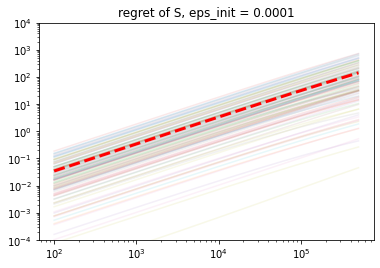

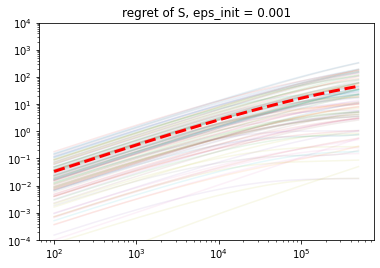

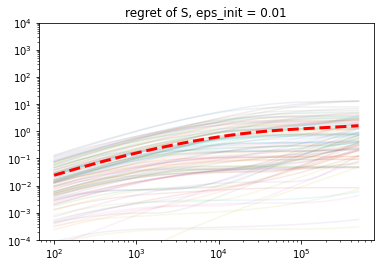

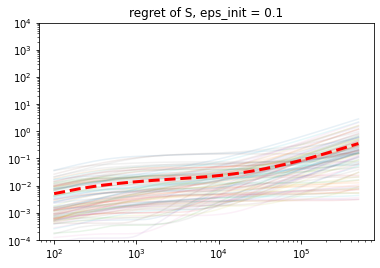

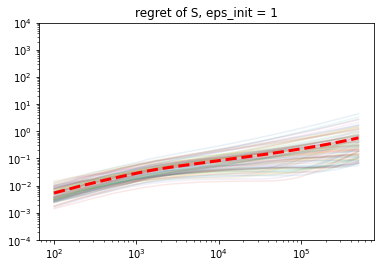

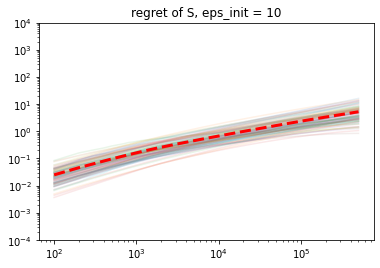

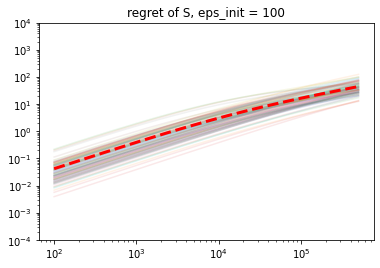

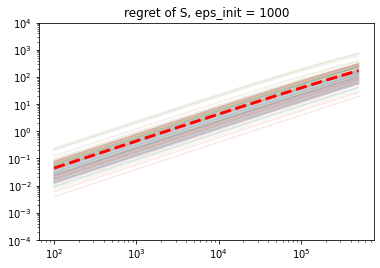

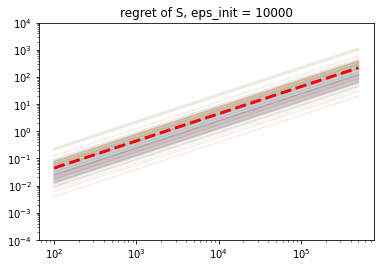

In [ ]:
for eps_init in list_eps_init:
    plot_S_regret(eps_init)

In [9]:
def plot_S_regret_nonlog(eps_init):
    folder = 'eps10e'+str(np.log10(eps_init))
    n_iter = 500000
    regret_S_all = np.load('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/regret_S_all_epsinit_'+str(eps_init)+'.npy')
    regret_S_average_all = np.load('permanent/result/S_chap_semi_discrete_eps_decreasing/'+folder+'/regret_S_average_all_epsinit_'+str(eps_init)+'.npy')
    plt.figure()
    for seed in range(100):
        plt.plot(range(100, n_iter+100, 100),regret_S_all[seed,:], alpha=0.1)
    plt.plot(range(100, n_iter+100, 100), regret_S_average_all, alpha=1,linestyle = '--', linewidth = 3, color = 'red')
    plt.ylim((0,10**(1)))
    plt.title('regret of S, eps_init = '+str(eps_init))
    # plt.yscale('log')
    # plt.xscale('log')
    plt.savefig('permanent/figure/S_chap_semi_discrete_eps_decreasing/regret_S_non_log_epsinit_'+str(eps_init)+'.png')
    plt.show()
    plt.close()

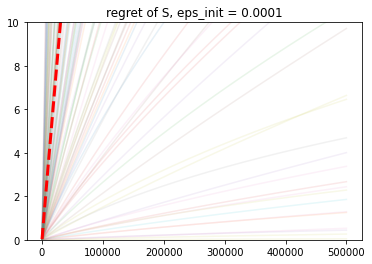

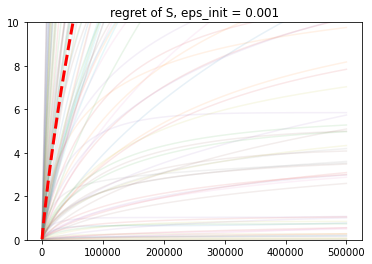

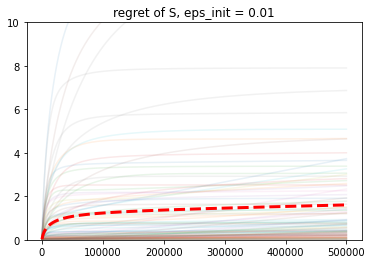

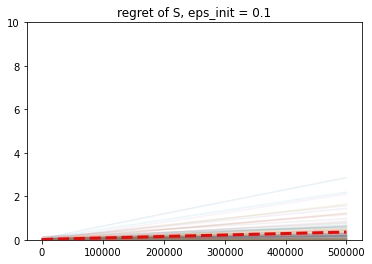

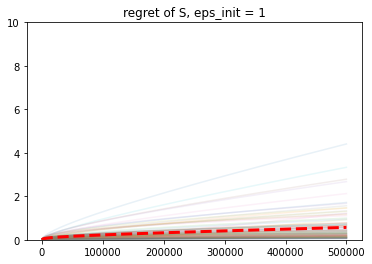

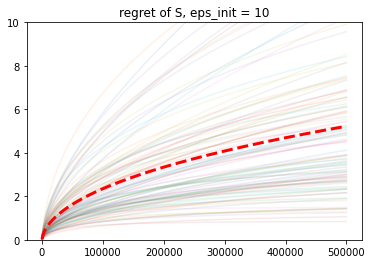

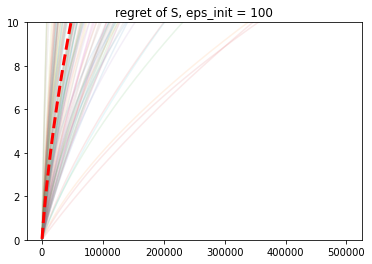

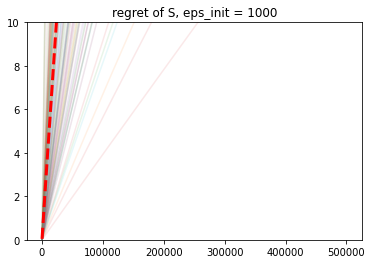

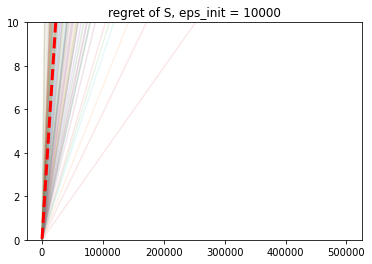

In [10]:
for eps_init in list_eps_init:
    plot_S_regret_nonlog(eps_init)